In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import datetime

In [2]:
df = pd.read_csv('the_guardian/combined_filtered.csv')

# Preprocess data

In [6]:
# Here is an example of an URL https://content.guardianapis.com/politics/2017/may/19/theresa-may-tories-will-invest-heavily-in-scotland-after-brexit
# I want to extract the date of release
# But may be useless

def extract_date(url):
    try:
        datereleased = datetime.datetime.strptime(datereleased, '%Y/%b/%d')
    except:
        datereleased = np.nan
    return theme, datereleased

In [10]:
# Change some information from the original dataset

def adapt_dataset(df):
    #remove useless columns : id, isHosted, sectionId, pillarId
    df.drop(['id', 'isHosted', 'sectionId', 'pillarId'], axis=1, inplace=True)
    # Change the name of columns
    df.rename(columns={'webPublicationDate': 'date', 'webTitle': 'title', 'sectionName': 'theme', 'Unnamed: 0':'index', 'fields.bodyText':"article"}, inplace=True)

# Analysis of data

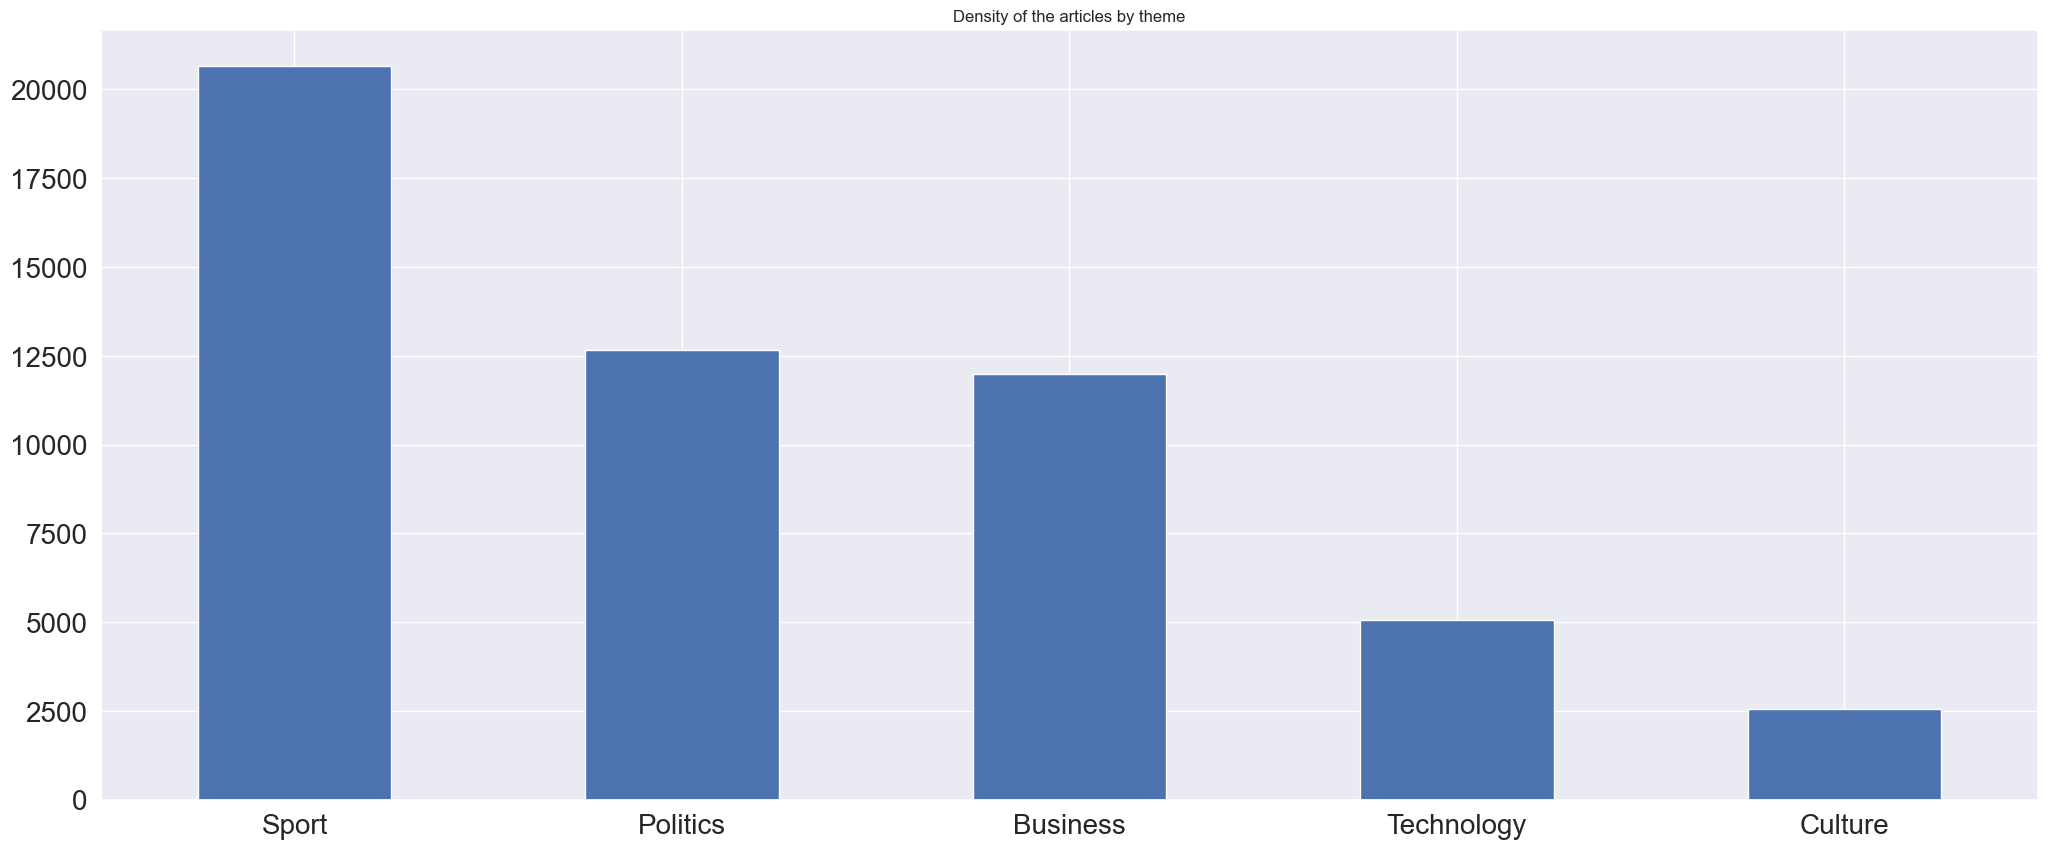

In [39]:
# Display the density of the articles by theme

def display_density(df):
    # Display the density of the articles by theme
    df['theme'].value_counts().plot(kind='bar', figsize=(25,10), fontsize=20)
    plt.title('Density of the articles by theme')
    plt.xticks(rotation=0)
    plt.show()

display_density(df)

<Figure size 2500x1000 with 0 Axes>

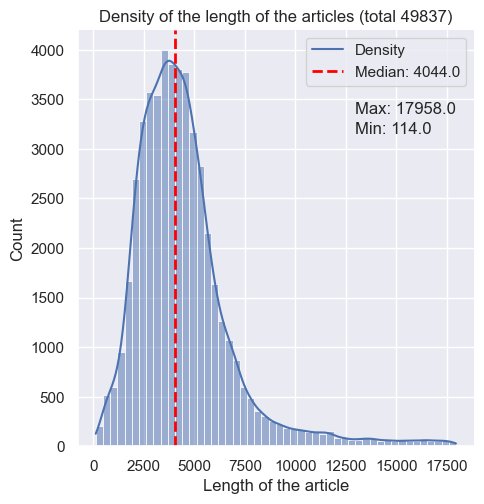

In [60]:
#Display the density of the length of the articles

def remove_outliers(df):
    # Display the density of the length of the articles
    df['length'] = df['article'].str.len()

    #Find the 95% quantile (to remove outliers)
    q = df['length'].quantile(0.95)

    #Keep only the values below the 95% quantile
    df = df[df['length'] < q]

    #Arbitrary: remove short sentences
    df = df[df['length'] > 100]

    return df

def display_length(df):
    #Plot 
    plt.figure(figsize=(25,10))
    fig = sns.displot(df["length"],bins=50, kde=True)

    #Plot median
    fig.ax.axvline(df["length"].median(), color='red', linestyle='dashed', linewidth=2)
    fig.ax.set_title(f'Density of the length of the articles (total {len(df["length"])})')
    fig.ax.set_xlabel('Length of the article')
    fig.ax.legend(['Density', f'Median: {df["length"].median()}'], loc='upper right')

    #Add text for the min and max values
    fig.ax.text(0.7, 0.8, f'Max: {df["length"].max()}', transform=fig.ax.transAxes)
    fig.ax.text(0.7, 0.75, f'Min: {df["length"].min()}', transform=fig.ax.transAxes)

    plt.show()

display_length(remove_outliers(df))